# **√âtude comparative entre la capitalisation et la r√©partition pour le syst√®me de retraite fran√ßais (1985-2025)**

## **üîç Objectif du projet**
Ce projet vise √† comparer les performances d‚Äôun **syst√®me de retraite par capitalisation** avec le **syst√®me actuel par r√©partition** en France.  
L‚Äôobjectif est de mod√©liser un **fonds souverain hypoth√©tique**, o√π les cotisations des actifs seraient investies sur les march√©s financiers, et d‚Äôanalyser **les rendements et les pensions** qu‚Äôun tel syst√®me aurait pu fournir entre 1985 et 2025.

---

## **üìà Choix des indices**
### **Pourquoi comparer le CAC40 et le S&P500 ?**
Nous d√©finissons **deux sc√©narios de r√©f√©rence** :
1. **Le CAC40 : un sc√©nario conservateur**  
   - Il repr√©sente **l‚Äô√©conomie fran√ßaise**, qui n‚Äôa pas b√©n√©fici√© d‚Äôune capitalisation massive via des fonds de pension.
   - Si un **fonds souverain fran√ßais** avait √©t√© instaur√© d√®s 1985, la capitalisation du CAC40 aurait logiquement √©t√© renforc√©e.

2. **Le S&P500 : un sc√©nario optimiste**  
   - Il est **d√©j√† massivement soutenu par des fonds de pension am√©ricains**.
   - Il permet **d‚Äôestimer ce que pourrait √™tre un CAC40 dans un mod√®le capitalis√© performant**.

üí° **Pourquoi cette comparaison ?**  
Cette approche permet d‚Äôavoir **une fourchette r√©aliste** entre un sc√©nario prudent (**le CAC40**) et une projection optimiste (**le S&P500**), illustrant ce qu‚Äôun syst√®me capitalis√© aurait pu g√©n√©rer en France.

---

### **üîó R√¥le des autres indices**
- **Le WGBI (World Government Bond Index)** est utilis√© comme **r√©f√©rence obligataire** pour la partie obligations des portefeuilles.

---

## **üìä M√©thodologie**
### **1Ô∏è‚É£ Collecte et pr√©traitement des donn√©es**
- R√©cup√©ration des historiques du **CAC40, S&P500 et WGBI**.
- **Reconstruction des donn√©es manquantes (backfill)** pour garantir une continuit√© temporelle.
- **Calcul des variations mensuels** pour assurer le backtest des dif√©rents portefeuils.

### **2Ô∏è‚É£ Simulation des allocations**
Nous mod√©lisons **4 portefeuilles types**, r√©partis de la mani√®re suivante :
- **50% actions / 50% obligations** (CAC40/WGBI et S&P500/WGBI).
- **75% actions / 25% obligations** (CAC40/WGBI et S&P500/WGBI).

**Hypoth√®se cl√©** : Les cotisations mensuelles sont **progressivement investies** dans ces portefeuilles (**DCA ‚Äì Dollar Cost Averaging**).

 **Frais de gestion** : Un taux de 0,5% annuel de frais √† √©t√© pris en compte, ce taux est un juste milieux entre les taux appliqu√©es dans les diff√©rentes formes de fonds (souverain, ETF, PE et)

### **3Ô∏è‚É£ Calcul des rendements et pensions**
- **Estimation des rendements annualis√©s** des diff√©rentes allocations.
- **D√©termination du taux de pr√©l√®vement optimal** pour garantir une pension stable sur **25 ans**, en coh√©rence avec l‚Äôesp√©rance de vie moyenne des retrait√©s.
- Ce taux permet de **maximiser les retraits** tout en assurant la viabilit√© du fonds.

### **4Ô∏è‚É£ Prise en compte de la solidarit√©**
- **Int√©gration des dispositifs de solidarit√© retraite** (ASPA, ASV) pour les b√©n√©ficiaires n‚Äôayant pas cotis√© pleinement.
- **Ajustement du mod√®le** pour inclure ces co√ªts dans l‚Äôestimation des pensions viables.

### **5Ô∏è‚É£ Analyse des r√©sultats**
- **Comparaison des pensions obtenues** avec celles du syst√®me actuel.
- **√âvaluation de l‚Äôimpact des diff√©rentes allocations** et des rendements observ√©s.
- **Visualisation des performances** du fonds de retraite hypoth√©tique.

---


In [1]:
import os

# Charger le chemin depuis le fichier texte
with open("../.path_repo.txt", "r") as f:
    path_repo = f.read().strip()

os.chdir(path_repo)

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Import du dataset clean√© et augment√© (backfill des valleurs manquantes)
df = pd.read_csv(r"data\processed\DataFrame_backfilled.csv",  index_col='Date', parse_dates=['Date'])

## üìå Cr√©ation des colonnes de variation

Afin de pouvoir calculer la performance des portefeuilles dans les √©tapes suivantes, nous cr√©ons des colonnes repr√©sentant la variation mensuelle de chaque indice.  
L‚Äôindex du DataFrame √©tant bas√© sur des dates mensuelles, la variation est calcul√©e par rapport au mois pr√©c√©dent pour chaque indice.

üîπ Ces variations permettront ensuite de simuler l‚Äôeffet des performances mensuelles sur un capital investi, en les appliquant successivement au fil du temps (logique de capitalisation).

In [3]:
df['SP500_var'] = df['SP500_TR'].pct_change()
df['CAC40_var'] = df['CAC40_TR'].pct_change()
df['WGBI_var'] = df['WGBI_TR'].pct_change()
df

SP500_TR      CAC40_TR       WGBI_TR  SP500_var  CAC40_var  \
Date                                                                         
1985-01-01    172.176132    692.288669  10000.000000        NaN        NaN   
1985-02-01    180.194935    720.457778  10235.623791   0.046573   0.040690   
1985-03-01    181.992612    726.738050   9832.991278   0.009976   0.008717   
1985-04-01    182.598183    728.870481  10019.526779   0.003327   0.002934   
1985-05-01    183.032920    730.405192  10250.878162   0.002381   0.002106   
...                  ...           ...           ...        ...        ...   
2024-08-01  12086.490234  23179.092370  55630.313495   0.013064  -0.025147   
2024-09-01  12292.099609  23646.248645  56093.077188   0.017012   0.020154   
2024-10-01  12598.030273  23654.766305  55534.603307   0.024888   0.000360   
2024-11-01  12533.190430  22857.802261  57289.947892  -0.005147  -0.033691   
2024-12-01  13245.660156  22211.844867  56892.306595   0.056847  -0.028260   

            WGBI_var  
Date                  
1985-01-01       NaN  
1985-02-01  0.023562  
1985-03-01 -0.039336  
1985-04-01  0.018970  
1985-05-01  0.023090  
...              ...  
2024-08-01  0.000550  
2024-09-01  0.008319  
2024-10-01 -0.009956  
2024-11-01  0.031608  
2024-12-01 -0.006941  

[480 rows x 6 columns]

## üìå Cr√©ation du DataFrame des salaires et cotisations mensuels

Les salaires m√©dians de 1985 et 2025 sont extraits de l‚ÄôINSEE. \
Entre ces deux dates, les salaires sont interpol√©s annuellement √† l‚Äôaide d‚Äôun taux de croissance constant.  
M√™me principe pour les taux de cotisation. \
Cela permet de simuler l‚Äô√©volution mensuelle des cotisations d‚Äôun salari√© moyen (ou plus exactement salari√© m√©dian).

In [4]:
# D√©finir les salaires et les taux
salaire_1985 = 1156  # Salaire m√©dian de 1985
salaire_2025 = 2735  # Salaire m√©dian de 2025
taux_1985 = 15.0  # Taux de cotisation en 1985
taux_2025 = 24.0  # Taux de cotisation en 2025

# Calcul du taux d'augmentation annuel pour le salaire
start_year = df.index.year.min()  # R√©cup√©rer l'ann√©e de d√©but depuis l'index de ton DataFrame
end_year = df.index.year.max()  # R√©cup√©rer l'ann√©e de fin depuis l'index de ton DataFrame

# Calcul du taux d'augmentation annuel du salaire
taux_augmentation_annuel_salaire = (salaire_2025 / salaire_1985) ** (1 / (end_year - start_year)) - 1

# Calcul du taux d'augmentation annuel du taux de cotisation
taux_augmentation_annuel_cotisation = (taux_2025 / taux_1985) ** (1 / (end_year - start_year)) - 1

# Cr√©ation des dates pour chaque ann√©e dans la p√©riode
dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS')

# Calcul du salaire mensuel pour chaque ann√©e
salaires = [salaire_1985 * (1 + taux_augmentation_annuel_salaire) ** (year - start_year) for year in range(start_year, end_year + 1)]

# Calcul du taux de cotisation pour chaque ann√©e
taux_cotisations = [taux_1985 * (1 + taux_augmentation_annuel_cotisation) ** (year - start_year) for year in range(start_year, end_year + 1)]

# R√©p√©ter les salaires et taux de cotisation pour chaque mois
salaire_mensuel = np.repeat(salaires, 12)
taux_cotisation_annuel = np.repeat(taux_cotisations, 12)

# Calcul des cotisations mensuelles
cotisations = salaire_mensuel * (taux_cotisation_annuel / 100)  # Conversion du taux de cotisation en pourcentage

# Cr√©ation du DataFrame
salaire_df = pd.DataFrame({'Date': dates, 'salaire_mensuel': salaire_mensuel, 'taux_cotisation': taux_cotisation_annuel, 'cotisations': cotisations})

# Ajout de la colone des cotisations cumul√©es
salaire_df["cotisations_cumulees"] = salaire_df["cotisations"].cumsum()

# Affichage des premi√®res lignes pour v√©rification
print(salaire_df)

          Date  salaire_mensuel  taux_cotisation  cotisations  \
0   1985-01-01           1156.0             15.0        173.4   
1   1985-02-01           1156.0             15.0        173.4   
2   1985-03-01           1156.0             15.0        173.4   
3   1985-04-01           1156.0             15.0        173.4   
4   1985-05-01           1156.0             15.0        173.4   
..         ...              ...              ...          ...   
475 2024-08-01           2735.0             24.0        656.4   
476 2024-09-01           2735.0             24.0        656.4   
477 2024-10-01           2735.0             24.0        656.4   
478 2024-11-01           2735.0             24.0        656.4   
479 2024-12-01           2735.0             24.0        656.4   

     cotisations_cumulees  
0              173.400000  
1              346.800000  
2              520.200000  
3              693.600000  
4              867.000000  
..                    ...  
475         172178.2899

In [5]:
# Fusionner les donn√©es de salaire avec les indices boursiers sur la date
df_ = salaire_df.merge(df[["SP500_var","CAC40_var","WGBI_var"]], on='Date', how='left')
df_.set_index("Date", inplace=True)
# V√©rification
df_

salaire_mensuel  taux_cotisation  cotisations  \
Date                                                        
1985-01-01           1156.0             15.0        173.4   
1985-02-01           1156.0             15.0        173.4   
1985-03-01           1156.0             15.0        173.4   
1985-04-01           1156.0             15.0        173.4   
1985-05-01           1156.0             15.0        173.4   
...                     ...              ...          ...   
2024-08-01           2735.0             24.0        656.4   
2024-09-01           2735.0             24.0        656.4   
2024-10-01           2735.0             24.0        656.4   
2024-11-01           2735.0             24.0        656.4   
2024-12-01           2735.0             24.0        656.4   

            cotisations_cumulees  SP500_var  CAC40_var  WGBI_var  
Date                                                              
1985-01-01            173.400000        NaN        NaN       NaN  
1985-02-01            346.800000   0.046573   0.040690  0.023562  
1985-03-01            520.200000   0.009976   0.008717 -0.039336  
1985-04-01            693.600000   0.003327   0.002934  0.018970  
1985-05-01            867.000000   0.002381   0.002106  0.023090  
...                          ...        ...        ...       ...  
2024-08-01         172178.289963   0.013064  -0.025147  0.000550  
2024-09-01         172834.689963   0.017012   0.020154  0.008319  
2024-10-01         173491.089963   0.024888   0.000360 -0.009956  
2024-11-01         174147.489963  -0.005147  -0.033691  0.031608  
2024-12-01         174803.889963   0.056847  -0.028260 -0.006941  

[480 rows x 7 columns]

## üìå Simulation de la capitalisation

L‚Äôobjectif de cette section est de mod√©liser ce qu‚Äôaurait pu g√©n√©rer un syst√®me de retraite par capitalisation, en supposant que les cotisations mensuelles n‚Äôavaient pas √©t√© imm√©diatement redistribu√©es, mais investies sur les march√©s financiers.

### Approche en DCA (Dollar Cost Averaging) üè¶
Chaque mois, les cotisations sont investies progressivement dans un portefeuille financier au lieu d‚Äô√™tre imm√©diatement revers√©es aux retrait√©s.

### M√©canisme d‚Äôaccumulation üí∞
Chaque mois, la valeur du capital est mise √† jour en appliquant la performance des indices correspondant √† l‚Äôallocation choisie.  
Les cotisations suivantes s‚Äôajoutent au capital d√©j√† constitu√©, cr√©ant un effet de capitalisation renforc√© par les int√©r√™ts compos√©s.

### Frais de gestion üîß
Pour garantir une approche r√©aliste dans ce sc√©nario hypoth√©tique, un taux de frais de gestion de 0,5 % a √©t√© retenu. \
Ce niveau constitue un bon compromis entre les tr√®s faibles frais des ETF (environ 0,1 %) et les frais parfois √©lev√©s des gestionnaires actifs priv√©s (jusqu‚Äô√† 2 %).
√âtant donn√© que notre sc√©nario repose sur un fonds public, un taux de 0,5 % para√Æt donc raisonnable et cr√©dible.

In [6]:
# Param√®tre : frais de gestion annuels
frais_annuels = 0.005  # 0.5% annuel
frais_mensuels = (1 + frais_annuels) ** (1/12) - 1

# Initialisation des colonnes
df_["CAC40_50/50"] = df_["cotisations"]
df_["SNP500_50/50"] = df_["cotisations"]
df_["CAC40_75/25"] = df_["cotisations"]
df_["SNP500_75/25"] = df_["cotisations"]

# Boucle mensuelle avec frais de gestion
for i in range(1, len(df_)):
    # CAC40 50/50
    prev_cac = df_.iloc[i - 1]["CAC40_50/50"]
    var = 0.5 * df_.iloc[i]["CAC40_var"] + 0.5 * df_.iloc[i]["WGBI_var"]
    df_.iloc[i, df_.columns.get_loc("CAC40_50/50")] = prev_cac * (1 + var - frais_mensuels) + df_.iloc[i]["cotisations"]

    # S&P500 50/50
    prev_snp = df_.iloc[i - 1]["SNP500_50/50"]
    var = 0.5 * df_.iloc[i]["SP500_var"] + 0.5 * df_.iloc[i]["WGBI_var"]
    df_.iloc[i, df_.columns.get_loc("SNP500_50/50")] = prev_snp * (1 + var - frais_mensuels) + df_.iloc[i]["cotisations"]

    # CAC40 75/25
    prev_cac = df_.iloc[i - 1]["CAC40_75/25"]
    var = 0.75 * df_.iloc[i]["CAC40_var"] + 0.25 * df_.iloc[i]["WGBI_var"]
    df_.iloc[i, df_.columns.get_loc("CAC40_75/25")] = prev_cac * (1 + var - frais_mensuels) + df_.iloc[i]["cotisations"]

    # S&P500 75/25
    prev_snp = df_.iloc[i - 1]["SNP500_75/25"]
    var = 0.75 * df_.iloc[i]["SP500_var"] + 0.25 * df_.iloc[i]["WGBI_var"]
    df_.iloc[i, df_.columns.get_loc("SNP500_75/25")] = prev_snp * (1 + var - frais_mensuels) + df_.iloc[i]["cotisations"]

# V√©rification
print(df_[["CAC40_50/50", "SNP500_50/50", "CAC40_75/25", "SNP500_75/25"]])


              CAC40_50/50   SNP500_50/50    CAC40_75/25  SNP500_75/25
Date                                                                 
1985-01-01     173.400000     173.400000     173.400000  1.734000e+02
1985-02-01     352.298582     352.808675     353.041057  3.538062e+02
1985-03-01     520.158552     520.882757     525.130561  5.262270e+02
1985-04-01     699.039252     699.873493     701.958385  7.032172e+02
1985-05-01     880.955026     881.895746     880.227168  8.816398e+02
...                   ...            ...            ...           ...
2024-08-01  486505.729242  651282.684620  604967.359739  9.721647e+05
2024-09-01  493885.962470  659916.850345  615774.858068  9.868422e+05
2024-10-01  491967.384890  665225.917643  614808.934010  1.003053e+06
2024-11-01  491906.795392  674407.144408  604532.621589  1.007346e+06
2024-12-01  483700.976313  691611.590857  591075.727255  1.048784e+06

[480 rows x 4 columns]


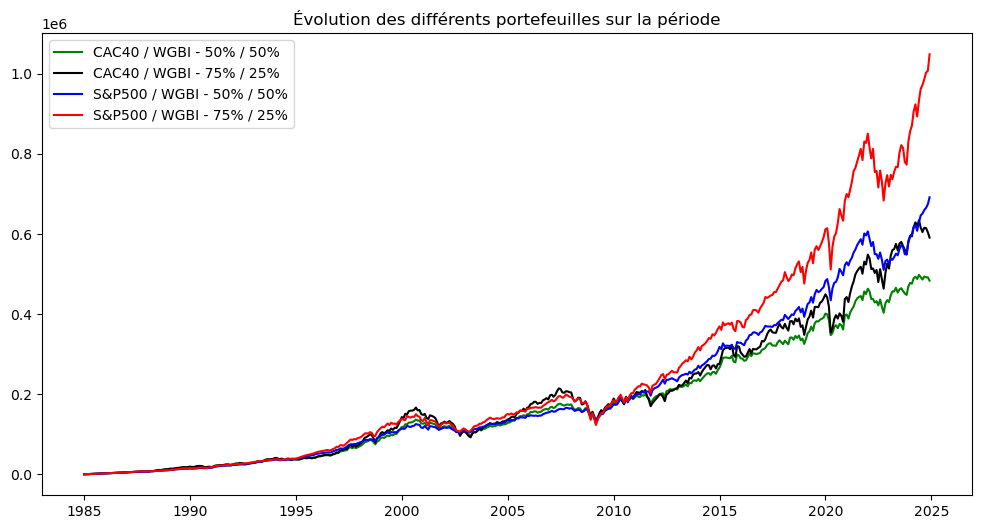

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df_.index, df_["CAC40_50/50"], label="CAC40 / WGBI - 50% / 50%", color="green")
plt.plot(df_.index, df_["CAC40_75/25"], label="CAC40 / WGBI - 75% / 25%", color="black")
plt.plot(df_.index, df_["SNP500_50/50"], label="S&P500 / WGBI - 50% / 50%", color="blue")
plt.plot(df_.index, df_["SNP500_75/25"], label="S&P500 / WGBI - 75% / 25%", color="red")

plt.legend()
plt.title("√âvolution des diff√©rents portefeuilles sur la p√©riode")
plt.savefig("charts/perf_portefeuilles.png", dpi=300, bbox_inches='tight')
plt.show()

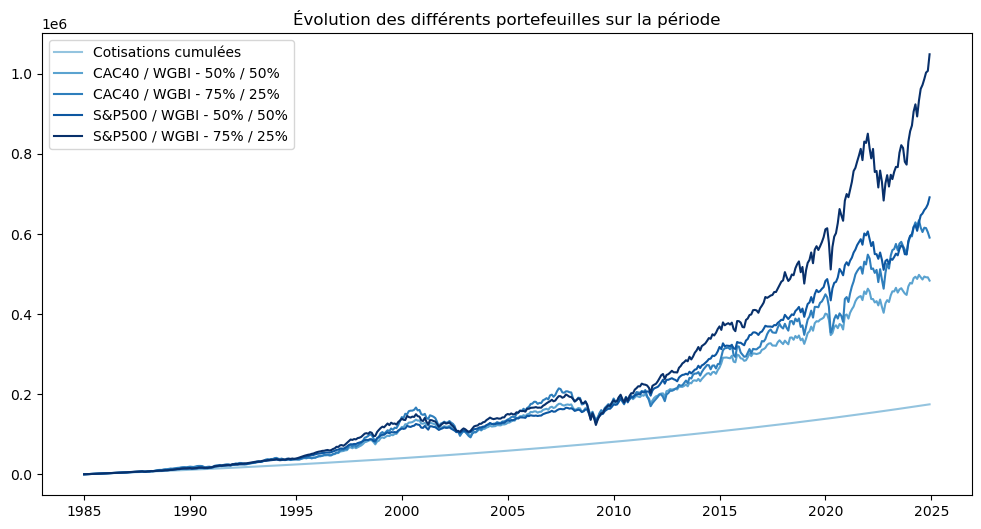

In [10]:
allocations = ['cotisations_cumulees', 'CAC40_50/50', 'CAC40_75/25', 'SNP500_50/50', 'SNP500_75/25']
colors = plt.cm.Blues(np.linspace(0.4, 1, len(allocations)))

plt.figure(figsize=(12,6))
plt.plot(df_.index, df_["cotisations_cumulees"], label="Cotisations cumul√©es", color=colors[0])
plt.plot(df_.index, df_["CAC40_50/50"], label="CAC40 / WGBI - 50% / 50%", color=colors[1])
plt.plot(df_.index, df_["CAC40_75/25"], label="CAC40 / WGBI - 75% / 25%", color=colors[2])
plt.plot(df_.index, df_["SNP500_50/50"], label="S&P500 / WGBI - 50% / 50%", color=colors[3])
plt.plot(df_.index, df_["SNP500_75/25"], label="S&P500 / WGBI - 75% / 25%", color=colors[4])

plt.legend()
plt.title("√âvolution des diff√©rents portefeuilles sur la p√©riode")
plt.savefig("charts/perf_portefeuilles_blue.png", dpi=300, bbox_inches='tight')
plt.show()

## üìå R√©sultat de la capitalisation :

√Ä partir du DataFrame des simulations, nous extrayons et stockons dans des variables cl√©s les montants finaux de capitalisation.  
Ces montants correspondent √† la somme totale des cotisations vers√©es, ainsi qu‚Äô√† leur valorisation au fil du temps gr√¢ce aux rendements des march√©s financiers.

üîπ Nous calculons ensuite des moyennes par type d‚Äôallocation (50/50, 75/25, etc.), ainsi qu‚Äôune moyenne g√©n√©rale tous portefeuilles confondus. \

Ces variables serviront de base aux comparaisons avec le syst√®me actuel par r√©partition.


In [12]:
# R√©cup√©rer la derni√®re valeur de chaque allocation
cumul_des_cotisations = df_["cotisations_cumulees"].iloc[-1]
cac_50_50_final = df_["CAC40_50/50"].iloc[-1]
cac_75_25_final = df_["CAC40_75/25"].iloc[-1]
snp_50_50_final = df_["SNP500_50/50"].iloc[-1]
snp_75_25_final = df_["SNP500_75/25"].iloc[-1]

# Afficher les r√©sultats
print(f"Cumul des cotisations: {cumul_des_cotisations/1000:.0f} k‚Ç¨")
print(f"CAC40 50/50 final: {cac_50_50_final/1000:.0f} k‚Ç¨")
print(f"CAC40 75/25 final: {cac_75_25_final/1000:.0f} k‚Ç¨")
print(f"S&P500 50/50 final: {snp_50_50_final/1000:.0f} k‚Ç¨")
print(f"S&P500 75/25 final: {snp_75_25_final/1000:.0f} k‚Ç¨")
print()

mean_50_50 = np.mean([cac_50_50_final, snp_50_50_final])
mean_75_75 = np.mean([cac_75_25_final, snp_75_25_final])
print(f"Mean 50/50 final: {mean_50_50/1000:.0f} k‚Ç¨")
print(f"Mean 75/25 final: {mean_75_75/1000:.0f} k‚Ç¨")
print()

global_mean = np.mean([mean_50_50, mean_75_75])
print(f"Global mean final: {global_mean/1000:.0f} k‚Ç¨")


Cumul des cotisations: 175 k‚Ç¨
CAC40 50/50 final: 484 k‚Ç¨
CAC40 75/25 final: 591 k‚Ç¨
S&P500 50/50 final: 692 k‚Ç¨
S&P500 75/25 final: 1049 k‚Ç¨

Mean 50/50 final: 588 k‚Ç¨
Mean 75/25 final: 820 k‚Ç¨

Global mean final: 704 k‚Ç¨


In [13]:
# Export du DataFrame
df_.to_csv(r"data\final\backtest_retraites_capitalisation.csv", index=True, encoding="utf-8")

## üìå Normalisation des indices

Nous construisons ici des indices normalis√©s pour comparer visuellement la performance relative des diff√©rents actifs (CAC40, S&P500, WGBI) sur la p√©riode √©tudi√©e.

üîπ Chaque indice est initialis√© √† une base 100 (ici repr√©sent√©e par 1.0) au d√©but de la p√©riode.  
üîπ √Ä chaque mois, la valeur pr√©c√©dente est multipli√©e par (1 + variation mensuelle), ce qui simule la croissance d‚Äôun capital fictif investi dans cet indice √† partir de 1985.

Ce proc√©d√© permet de visualiser l‚Äô√©volution compar√©e des indices sur une m√™me √©chelle, ind√©pendamment de leur valeur nominale initiale.

In [14]:
# Initialisation √† 1 pour chaque colonne normalis√©e
df_['SP500_norm'] = 1.0
df_['CAC40_norm'] = 1.0
df_['WGBI_norm'] = 1.0

# Application des variations cumul√©es mois par mois
for i in range(1, len(df_)):
    df_.iloc[i, df_.columns.get_loc('SP500_norm')] = df_.iloc[i - 1, df_.columns.get_loc('SP500_norm')] * (
        1 + df_.iloc[i, df_.columns.get_loc('SP500_var')])
    df_.iloc[i, df_.columns.get_loc('CAC40_norm')] = df_.iloc[i - 1, df_.columns.get_loc('CAC40_norm')] * (
        1 + df_.iloc[i, df_.columns.get_loc('CAC40_var')])
    df_.iloc[i, df_.columns.get_loc('WGBI_norm')] = df_.iloc[i - 1, df_.columns.get_loc('WGBI_norm')] * (
        1 + df_.iloc[i, df_.columns.get_loc('WGBI_var')])

## üìå Performance annualis√©e de nos portefeuilles

Nous calculons le rendement annuel compos√© pour chaque portefeuille (50/50 ou 75/25 entre actions et obligations).  
Cela permet de quantifier la performance sur 40 ans et de comparer les strat√©gies.

In [15]:
# Nombre d'ann√©es simul√©es
years = len(df_) / 12  # = 40 ans

# Calcul des rendements annualis√©s pour chaque portefeuille simul√©
cac40_50_50_rdt = (((df_["CAC40_norm"].iloc[-1] / df_["CAC40_norm"].iloc[0]) * 0.5 +
                    (df_["WGBI_norm"].iloc[-1] / df_["WGBI_norm"].iloc[0]) * 0.5) ** (1 / years)) - 1
cac40_75_25_rdt = (((df_["CAC40_norm"].iloc[-1] / df_["CAC40_norm"].iloc[0]) * 0.75 +
                    (df_["WGBI_norm"].iloc[-1] / df_["WGBI_norm"].iloc[0]) * 0.25) ** (1 / years)) - 1
snp500_50_50_rdt = (((df_["SP500_norm"].iloc[-1] / df_["SP500_norm"].iloc[0]) * 0.5 +
                     (df_["WGBI_norm"].iloc[-1] / df_["WGBI_norm"].iloc[0]) * 0.5) ** (1 / years)) - 1
snp500_75_25_rdt = (((df_["SP500_norm"].iloc[-1] / df_["SP500_norm"].iloc[0]) * 0.75 +
                     (df_["WGBI_norm"].iloc[-1] / df_["WGBI_norm"].iloc[0]) * 0.25) ** (1 / years)) - 1


# Affichage
print(f"CAC40 50/50 annualis√© : {cac40_50_50_rdt * 100:.2f}%")
print(f"CAC40 75/25 annualis√© : {cac40_75_25_rdt * 100:.2f}%")
print(f"S&P500 50/50 annualis√© : {snp500_50_50_rdt * 100:.2f}%")
print(f"S&P500 75/25 annualis√© : {snp500_75_25_rdt * 100:.2f}%")


CAC40 50/50 annualis√© : 7.62%
CAC40 75/25 annualis√© : 8.43%
S&P500 50/50 annualis√© : 9.75%
S&P500 75/25 annualis√© : 10.74%


## üìå Calcul du taux de retrait maximum

üîπ Il ne serait pas coh√©rent de comparer une retraite par r√©partition avec une retraite capitalis√©e fond√©e sur la simple r√®gle des 4%, qui vise √† pr√©server le capital.  
Dans un mod√®le de fonds souverain, l'objectif est d'√©puiser progressivement le capital sur la dur√©e de la retraite.  
Il est donc n√©cessaire de calculer un taux de retrait "optimal", maximisant les pensions tout en assurant une viabilit√© sur 25 ans.\
La dur√©e de vie moyenne des retrait√©s en France en 2024 est de 26,1 ans pour les femmes, et 23,3 ans pour les hommes, soit 24,7 en moyenne.
üîπ Par simplicit√© nous choisison le taux de retrais le plus faible (celui du s√©nario le plus conservateur), si on applique ce taux aux autres s√©narios le montant sera donc sur√©valuer, mais nous pourrons simplement soustraire le r√©sultat du taux de retrait le plus faible appliquer √† son s√©nario aux autres pour obtenir la pension exacte.

## üìå Calcul du taux de retrait maximum

üîπ Il ne serait pas pertinent de comparer une retraite par r√©partition avec une retraite capitalis√©e en appliquant la simple r√®gle des 4 %, con√ßue pour pr√©server le capital √† vie.  
Dans une logique de fonds souverain, l‚Äôobjectif est au contraire d‚Äôutiliser le capital accumul√© pour financer les pensions tout au long de la retraite, en l‚Äô√©puisant progressivement.

üéØ L‚Äôobjectif est donc de d√©terminer un **taux de retrait optimal**, c‚Äôest-√†-dire le pourcentage du capital qu‚Äôun retrait√© peut percevoir chaque ann√©e, tout en s‚Äôassurant que celui-ci reste suffisant pendant toute la dur√©e de la retraite.

üìÖ En 2024, la dur√©e de vie moyenne √† la retraite en France est estim√©e √† :
- 26,1 ans pour les femmes,
- 23,3 ans pour les hommes,  
‚û°Ô∏è Soit une moyenne de **24,7 ans**.

In [16]:
withdrawal_years = 25

def safe_withdrawal_rate(annual_return, years):
    return annual_return / (1 - (1 + annual_return) ** -years)

cac40_50_50_swr = safe_withdrawal_rate(cac40_50_50_rdt, withdrawal_years)
cac40_75_25_swr = safe_withdrawal_rate(cac40_75_25_rdt, withdrawal_years)
snp500_50_50_swr = safe_withdrawal_rate(snp500_50_50_rdt, withdrawal_years)
snp500_75_25_swr = safe_withdrawal_rate(snp500_75_25_rdt, withdrawal_years)

print(f"CAC40 50/50 Safe withdrawal : {cac40_50_50_swr:.2%}")
print(f"CAC40 75/25 Safe withdrawal : {cac40_75_25_swr:.2%}")
print(f"S&P500 50/50 Safe withdrawal : {snp500_50_50_swr:.2%}")
print(f"S&P500 75/25 Safe withdrawal : {snp500_75_25_swr:.2%}")

# On s√©lectionne le pourcentage le plus prudent (le plus faible) et on l'arrondit √† 7%
withdrawal_rate_selected = min(cac40_50_50_swr, cac40_75_25_swr, snp500_50_50_swr, snp500_75_25_swr)
print()
print(f"Taux de pr√©l√®vement s√©lectionn√© : {withdrawal_rate_selected:.2%}")


CAC40 50/50 Safe withdrawal : 9.07%
CAC40 75/25 Safe withdrawal : 9.72%
S&P500 50/50 Safe withdrawal : 10.81%
S&P500 75/25 Safe withdrawal : 11.65%

Taux de pr√©l√®vement s√©lectionn√© : 9.07%


## üìå Retraite moyenne et retraite m√©diane en France

Selon le rapport annuel de la **DREES** (Direction de la Recherche, des √âtudes, de l‚Äô√âvaluation et des Statistiques)\[1\], \
la **pension moyenne brute de droit direct**, incluant la majoration pour trois enfants ou plus, \
s‚Äô√©levait √† **1 626 ‚Ç¨ bruts mensuels** en d√©cembre 2022, pour les nouveaux retrait√©s r√©sidant en France.

üîπ Ce montant servira de **r√©f√©rence comparative** tout au long de l‚Äô√©tude, afin d‚Äô√©valuer la performance des pensions issues d‚Äôun syst√®me capitalis√© simul√©.

\[1\] *DREES, Les retrait√©s et les retraites ‚Äì √©dition 2023.*


In [17]:
# Montant de la pension retraite brute m√©diane en France en 2022 :
retraite_actuelle = 1626

# Calcul du montant des cotisations
cac_50_50_pension = cac_50_50_final * withdrawal_rate_selected / 12
cac_75_25_pension = cac_75_25_final * withdrawal_rate_selected / 12
snp_50_50_pension = snp_50_50_final * withdrawal_rate_selected / 12
snp_75_25_pension = snp_75_25_final * withdrawal_rate_selected / 12

print(f"Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 50/50 : {int(cac_50_50_pension)}‚Ç¨")
print(f"Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 75/20 : {int(cac_75_25_pension)}‚Ç¨")
print(f"Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 50/50 : {int(snp_50_50_pension)}‚Ç¨")
print(f"Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 75/75 : {int(snp_75_25_pension)}‚Ç¨")

Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 50/50 : 3655‚Ç¨
Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 75/20 : 4466‚Ç¨
Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 50/50 : 5226‚Ç¨
Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 75/75 : 7925‚Ç¨


## üìå Int√©gration des prestations de solidarit√©

Les estimations de pensions mensuelles calcul√©es jusqu'ici **n‚Äôincluent pas** les dispositifs de solidarit√© comme l‚Äô**ASPA** (Allocation de Solidarit√© aux Personnes √Çg√©es) et l‚Äô**ASV** (Allocation Suppl√©mentaire du Minimum Vieillesse), vers√©s aux retrait√©s ayant peu ou pas cotis√©.

üîπ Pour √©valuer la viabilit√© d‚Äôun syst√®me capitalis√©, il est important d‚Äôestimer le **co√ªt global de ces prestations**, afin de simuler leur prise en charge par un m√©canisme solidaire int√©gr√© √† la capitalisation.

### üìä Donn√©es cl√©s :

- **801‚ÄØ000 b√©n√©ficiaires** du minimum vieillesse fin 2023  
  - Dont **594‚ÄØ000** pour l‚ÄôASPA  
  - Et **117‚ÄØ000** pour l‚ÄôASV  
- **Montants moyens mensuels** en 2022 :  
  - **495 ‚Ç¨ pour l‚ÄôASPA**  
  - **440 ‚Ç¨ pour l‚ÄôASV**  
- **Nombre total de retrait√©s** en France : environ **17 millions**  
  - Dont **15,3 millions** affili√©s au **r√©gime g√©n√©ral**
  
### üìà Hypoth√®se d‚Äôint√©gration au mod√®le :

En l‚Äôabsence de donn√©es individuelles pr√©cises, nous estimons un co√ªt global bas√© sur l‚Äôhypoth√®se que tous les b√©n√©ficiaires actuels n‚Äôauraient **aucun capital accumul√©** dans un syst√®me par capitalisation.  
Or, en r√©alit√©, une **part importante de ces retrait√©s a probablement cotis√© partiellement** au cours de leur carri√®re, ce qui signifie qu‚Äôils auraient accumul√© un capital partiel.  

‚û°Ô∏è Notre estimation constitue donc une **surestimation prudente** du co√ªt r√©el de la solidarit√© dans un mod√®le capitalis√©. Elle permet n√©anmoins d‚Äô√©valuer un **ordre de grandeur** r√©aliste et d‚Äôenvisager l‚Äôinclusion d‚Äôun **filet de s√©curit√© minimal**, sans remettre en cause l‚Äô√©quilibre du syst√®me.

In [18]:
ASPA_2023 = 594_000*495*12
ASV_2023 = 117_000*440*12
solidarit√©e_2023_milliards = (ASPA_2023 + ASV_2023) / 1_000_000_000
print(f"Montant des solidarit√©es retraites en 2023 environ = {int(solidarit√©e_2023_milliards)} Milliards")

nbr_retraites_2022 = 17_000_000
capi_aproximative_milliards = nbr_retraites_2022 * retraite_actuelle / 1_000_000_000
print(f"Montant total vers√© aux retraites en 2023 environ = {int(capi_aproximative_milliards)} Milliards")

print()
capi_total_cac_50_50 = cac_50_50_final * nbr_retraites_2022
print(f"Capitalisation total du fond CAC 40 50/50 = {int(capi_total_cac_50_50 / 1_000_000_000)} Milliards")
print()

# Taux de solidarit√© n√©cessaire (automatique)
taux_solidarit√©_dynamique = (solidarit√©e_2023_milliards * 1e9) / (cac_50_50_pension * 12 * nbr_retraites_2022)

print(f"Taux de solidarit√© (√† d√©duire des pensions) = {round(taux_solidarit√©_dynamique*100,2)} %")

Montant des solidarit√©es retraites en 2023 environ = 4 Milliards
Montant total vers√© aux retraites en 2023 environ = 27 Milliards

Capitalisation total du fond CAC 40 50/50 = 8222 Milliards

Taux de solidarit√© (√† d√©duire des pensions) = 0.56 %


## üìå R√©√©valuation des pensions mensuelles

Nous recalculons d√©sormais les pensions mensuelles en int√©grant la contribution de solidarit√© estim√©e pr√©c√©demment.

üîπ Cette r√©√©valuation permet de simuler un syst√®me de retraite par capitalisation **int√©grant une dimension redistributive**, en prenant en compte le co√ªt approximatif des prestations minimales (ASPA, ASV).

Cela permet d'obtenir une estimation plus compl√®te et plus r√©aliste des pensions nettes de solidarit√©, telles qu‚Äôelles pourraient √™tre vers√©es dans un mod√®le hybride.

In [19]:
# Calcul du montant des cotisations
cac_50_50_solidaire = cac_50_50_pension - (cac_50_50_pension*taux_solidarit√©_dynamique)
cac_75_25_solidaire = cac_75_25_pension - (cac_50_50_pension*taux_solidarit√©_dynamique)
snp_50_50_solidaire = snp_50_50_pension - (cac_50_50_pension*taux_solidarit√©_dynamique)
snp_75_25_solidaire = snp_75_25_pension - (cac_50_50_pension*taux_solidarit√©_dynamique)

print("RESULTATS FINAUX :")
print(f"Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 50/50 (solidarit√©e d√©duite) : {int(cac_50_50_solidaire)}‚Ç¨")
print(f"Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 75/20 (solidarit√©e d√©duite) : {int(cac_75_25_solidaire)}‚Ç¨")
print(f"Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 50/50 (solidarit√©e d√©duite) : {int(snp_50_50_solidaire)}‚Ç¨")
print(f"Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 75/75 (solidarit√©e d√©duite) : {int(snp_75_25_solidaire)}‚Ç¨")

RESULTATS FINAUX :
Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 50/50 (solidarit√©e d√©duite) : 3634‚Ç¨
Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 75/20 (solidarit√©e d√©duite) : 4446‚Ç¨
Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 50/50 (solidarit√©e d√©duite) : 5205‚Ç¨
Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 75/75 (solidarit√©e d√©duite) : 7904‚Ç¨


## üìå Comparaison visuelle des pensions mensuelles

Les graphiques suivants comparent les pensions g√©n√©r√©es par les diff√©rentes allocations de portefeuille avec la pension m√©diane actuelle issue du syst√®me par r√©partition.  
La ligne rouge indique le niveau de r√©f√©rence du syst√®me actuel (1 626 ‚Ç¨).

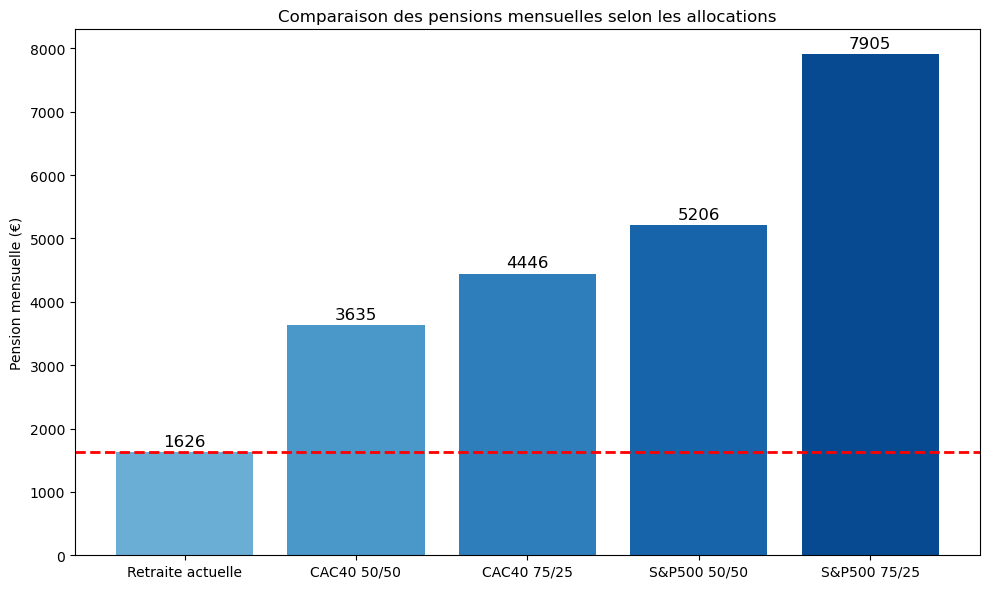

In [20]:
# R√©cup√©ration des montants calcul√©s
pensions = [retraite_actuelle, cac_50_50_solidaire, cac_75_25_solidaire, snp_50_50_solidaire, snp_75_25_solidaire]
allocations = ['Retraite actuelle', 'CAC40 50/50', 'CAC40 75/25', 'S&P500 50/50', 'S&P500 75/25']

# Cr√©ation du graphique
plt.figure(figsize=(10,6))

# Appliquer une couleur plus harmonieuse avec un gradient de bleu
colors = plt.cm.Blues(np.linspace(0.5, 0.9, len(allocations)))  # Cr√©e un gradient de bleu

# G√©n√©rer les barres
bars = plt.bar(allocations, pensions, color=colors)

# Ajouter les labels au-dessus des barres
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50,  # Position du texte
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=12)  # Affichage du montant

# Ajouter la ligne de r√©f√©rence en pointill√© rouge
plt.axhline(y=retraite_actuelle, color='red', linestyle='--', linewidth=2)

# Titre et labels
plt.title("Comparaison des pensions mensuelles selon les allocations")

plt.ylabel("Pension mensuelle (‚Ç¨)")
plt.tight_layout()

# Sauvegarde du graphique
plt.savefig("charts/comparaison_pensions_1.png", dpi=300, bbox_inches='tight')

# Affichage du graphique
plt.show()

## üìå Optimisation du taux de pr√©l√®vement

Nous avons choisi d‚Äôappliquer un **taux de pr√©l√®vement annuel uniforme de 9 %**, correspondant au **taux s√©curis√©** calcul√© pour l‚Äôallocation la moins performante de notre simulation.  
üîπ Ce taux est volontairement **prudent**, car il garantit que le capital accumul√© reste suffisant pour couvrir **25 ann√©es de retraite**, en coh√©rence avec l‚Äôesp√©rance de vie moyenne des retrait√©s en France.

üí° Pour affiner l‚Äôanalyse, nous avons √©galement d√©termin√© des **taux de retrait optimaux sp√©cifiques √† chaque allocation**.  
Ces taux tiennent compte de la performance r√©elle de chaque portefeuille et permettent de **maximiser les pensions** sans risque d‚Äô√©puisement pr√©matur√© du capital.

‚û°Ô∏è Dans les cas o√π l‚Äôallocation est plus dynamique (par exemple avec une forte exposition au **S&P500**), un taux de pr√©l√®vement sup√©rieur serait viable, conduisant √† des **pensions plus √©lev√©es** que celles pr√©sent√©es ici √† titre conservateur.



In [21]:
# Calcul du montant des cotisations
cac_50_50_pension_opti = (cac_50_50_final * cac40_50_50_swr / 12) - (cac_50_50_pension*taux_solidarit√©_dynamique)
cac_75_25_pension_opti = (cac_75_25_final * cac40_75_25_swr / 12) - (cac_50_50_pension*taux_solidarit√©_dynamique)
snp_50_50_pension_opti = (snp_50_50_final * snp500_50_50_swr / 12) - (cac_50_50_pension*taux_solidarit√©_dynamique)
snp_75_25_pension_opti = (snp_75_25_final * snp500_75_25_swr / 12) - (cac_50_50_pension*taux_solidarit√©_dynamique)

print("RESULTATS optimis√©s :")
print(f"pension mensuelle pour l'allocation CAC 40 / World Bonds 50/50 optimis√©e : {int(cac_50_50_pension_opti)}‚Ç¨")
print(f"pension mensuelle pour l'allocation CAC 40 / World Bonds 75/20 optimis√©e : {int(cac_75_25_pension_opti)}‚Ç¨")
print(f"pension mensuelle pour l'allocation S&P 500 / World Bonds 50/50 optimis√©e : {int(snp_50_50_pension_opti)}‚Ç¨")
print(f"pension mensuelle pour l'allocation S&P 500 / World Bonds 75/75 optimis√©e : {int(snp_75_25_pension_opti)}‚Ç¨")

RESULTATS optimis√©s :
pension mensuelle pour l'allocation CAC 40 / World Bonds 50/50 optimis√©e : 3634‚Ç¨
pension mensuelle pour l'allocation CAC 40 / World Bonds 75/20 optimis√©e : 4765‚Ç¨
pension mensuelle pour l'allocation S&P 500 / World Bonds 50/50 optimis√©e : 6207‚Ç¨
pension mensuelle pour l'allocation S&P 500 / World Bonds 75/75 optimis√©e : 10158‚Ç¨


In [22]:
# Dataframe des r√©sultats
df_resultats = pd.DataFrame({"Allocation": ["Retraite m√©diane actuelle",
                                            "CAC 40 / World Bonds 50/50",
                                            "CAC 40 / World Bonds 75/25",
                                            "S&P 500 / World Bonds 50/50",
                                            "S&P 500 / World Bonds 75/75"],
                            "Pension mensuelle optimis√©e (‚Ç¨)": [int(1626),
                                                                int(cac_50_50_pension_opti),
                                                                int(cac_75_25_pension_opti),
                                                                int(snp_50_50_pension_opti),
                                                                int(snp_75_25_pension_opti)  ]  }  )

# Export en CSV
df_resultats.to_csv(r"data\final\resultats_pensions_optimisees.csv", index=False)

In [23]:
print(f"CAC40 50/50 Safe withdrawal : {cac40_50_50_swr:.2%}")
print(f"CAC40 75/25 Safe withdrawal : {cac40_75_25_swr:.2%}")
print(f"S&P500 50/50 Safe withdrawal : {snp500_50_50_swr:.2%}")
print(f"S&P500 75/25 Safe withdrawal : {snp500_75_25_swr:.2%}")

CAC40 50/50 Safe withdrawal : 9.07%
CAC40 75/25 Safe withdrawal : 9.72%
S&P500 50/50 Safe withdrawal : 10.81%
S&P500 75/25 Safe withdrawal : 11.65%


## üìå Comparaison visuelle des pensions mensuelles ‚Äì Version optimis√©e

Les graphiques suivants comparent les pensions mensuelles simul√©es pour chaque allocation de portefeuille avec la pension moyenne actuelle issue du syst√®me par r√©partition (**1 626 ‚Ç¨ bruts**).  
La ligne rouge repr√©sente ce niveau de r√©f√©rence.

Contrairement √† la premi√®re version, les pensions affich√©es ici sont calcul√©es √† partir d‚Äôun **taux de retrait sp√©cifique √† chaque portefeuille**, optimis√© en fonction de sa performance historique.  
Cela permet de refl√©ter plus fid√®lement le **potentiel r√©el** de chaque strat√©gie d‚Äôinvestissement dans un syst√®me de retraite par capitalisation.

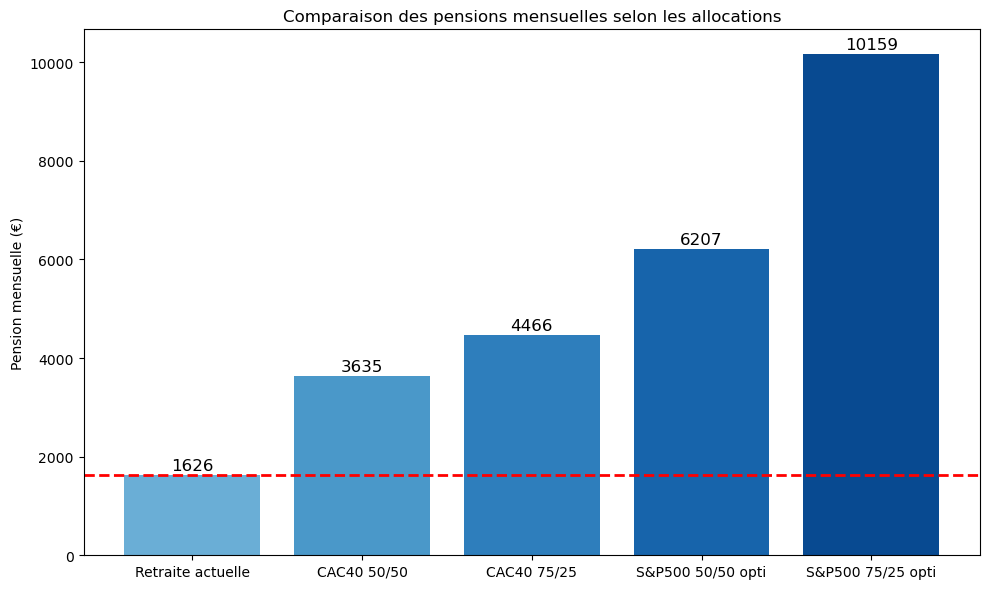

In [24]:
# R√©cup√©ration des montants calcul√©s
pensions = [retraite_actuelle, cac_50_50_solidaire, cac_75_25_pension, snp_50_50_pension_opti, snp_75_25_pension_opti]
allocations = ['Retraite actuelle', 'CAC40 50/50', 'CAC40 75/25', 'S&P500 50/50 opti', 'S&P500 75/25 opti']

# Cr√©ation du graphique
plt.figure(figsize=(10,6))

# Appliquer une couleur plus harmonieuse avec un gradient de bleu
colors = plt.cm.Blues(np.linspace(0.5, 0.9, len(allocations)))  # Cr√©e un gradient de bleu

# G√©n√©rer les barres
bars = plt.bar(allocations, pensions, color=colors)

# Ajouter les labels au-dessus des barres
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50,  # Position du texte
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=12)  # Affichage du montant

# Ajouter la ligne de r√©f√©rence en pointill√© rouge
plt.axhline(y=retraite_actuelle, color='red', linestyle='--', linewidth=2)

# Titre et labels
plt.title("Comparaison des pensions mensuelles selon les allocations")

plt.ylabel("Pension mensuelle (‚Ç¨)")
plt.tight_layout()

# Sauvegarde du graphique
plt.savefig("charts/comparaison_pensions_2.png", dpi=300, bbox_inches='tight')

# Affichage du graphique
plt.show()


C:\Users\Vincent\AppData\Local\Temp\ipykernel_13044\4095467334.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=allocations, y=pensions, palette=palette)


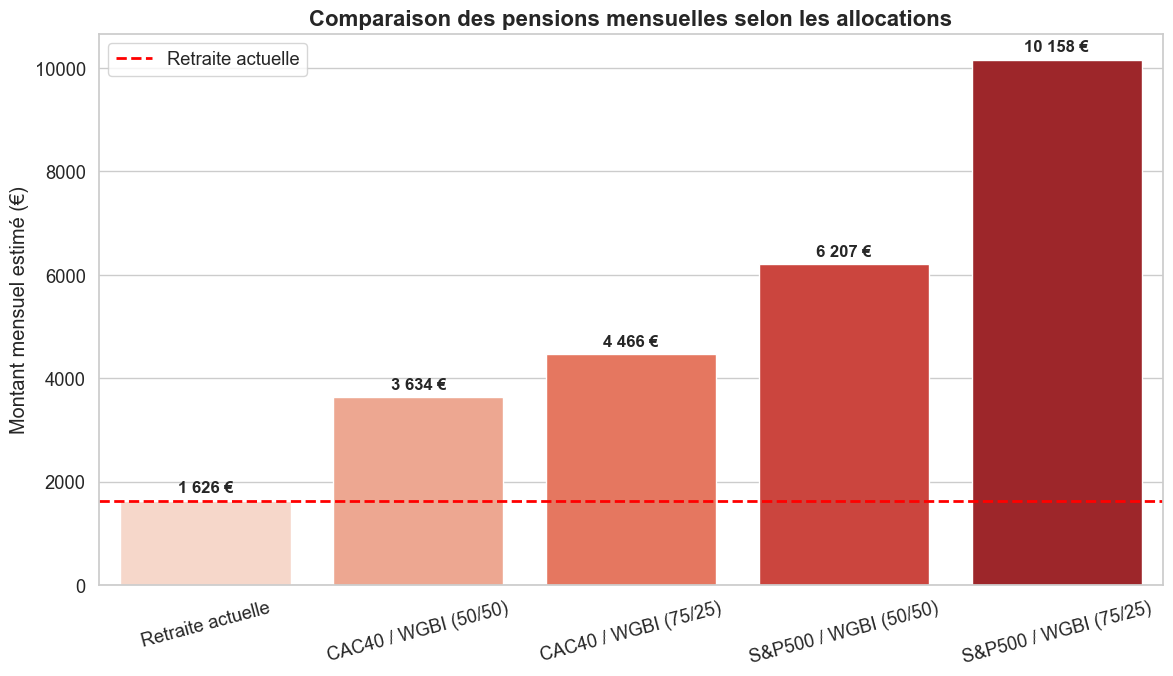

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Donn√©es
pensions = [retraite_actuelle, cac_50_50_solidaire, cac_75_25_pension, snp_50_50_pension_opti, snp_75_25_pension_opti]
allocations = ['Retraite actuelle', 'CAC40 / WGBI (50/50)', 'CAC40 / WGBI (75/25)', 'S&P500 / WGBI (50/50)', 'S&P500 / WGBI (75/25)']

# Setup Seaborn pour un style pro
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 7))

# Palette de couleurs avec d√©grad√© bleu harmonieux
palette = sns.color_palette("Reds", len(allocations))

# Cr√©ation du barplot
ax = sns.barplot(x=allocations, y=pensions, palette=palette)

# Ajouter les montants au-dessus de chaque barre
for i, bar in enumerate(ax.patches):
    value = pensions[i]
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + max(pensions) * 0.01,  # Ajuste dynamiquement la hauteur du texte
            f'{int(value):,} ‚Ç¨'.replace(',', ' '),  # Format fran√ßais avec espaces
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Ligne de r√©f√©rence pour la retraite actuelle
plt.axhline(y=retraite_actuelle, color='red', linestyle='--', linewidth=2, label='Retraite actuelle')

# Titre et axes
plt.title("Comparaison des pensions mensuelles selon les allocations", fontsize=16, fontweight='bold')
plt.ylabel("Montant mensuel estim√© (‚Ç¨)")
plt.xlabel("")
plt.xticks(rotation=15)

# L√©gende + marges
plt.legend()
plt.tight_layout()

# Sauvegarde HD
plt.savefig("charts/comparaison_pensions_red.png", dpi=300, bbox_inches='tight')

# Affichage
plt.show()


## üìå Calcul des coefficients multiplicateurs

Pour terminer, et afin d‚Äôillustrer l‚Äô√©cart significatif entre les diff√©rents sc√©narios, nous calculons les **coefficients multiplicateurs** des pensions issues de chaque allocation par rapport √† la **pension moyenne brute actuelle** du syst√®me par r√©partition (1 626 ‚Ç¨).

üîπ Ces coefficients indiquent de combien la pension aurait √©t√© **multipli√©e** dans un syst√®me par capitalisation, selon l‚Äôallocation choisie.

Cela permet de visualiser tr√®s simplement le **gain potentiel** offert par un mod√®le capitalis√© sur le long terme.

In [26]:
# Calcul des multiples
multiple_cac_50_50 = cac_50_50_pension / retraite_actuelle
multiple_cac_75_25 = cac_75_25_pension / retraite_actuelle
multiple_cac_75_25_opti = cac_75_25_pension_opti / retraite_actuelle
multiple_snp_50_50 = snp_50_50_pension / retraite_actuelle
multiple_snp_50_50_opti = snp_50_50_pension_opti / retraite_actuelle
multiple_snp_75_25 = snp_75_25_pension / retraite_actuelle
multiple_snp_75_25_opti = snp_75_25_pension_opti / retraite_actuelle

# Affichage des r√©sultats
print(f"Multiple CAC40 50/50 : --------- x{multiple_cac_50_50:.2f}")
print(f"Multiple CAC40 75/25 : --------- x{multiple_cac_75_25:.2f}")
print(f"Multiple CAC40 75/25 optimis√© :  x{multiple_cac_75_25_opti:.2f}")
print(f"Multiple S&P500 50/50 : -------- x{multiple_snp_50_50:.2f}")
print(f"Multiple S&P500 50/50 optimis√© : x{multiple_snp_50_50_opti:.2f}")
print(f"Multiple S&P500 75/25 : -------- x{multiple_snp_75_25:.2f}")
print(f"Multiple S&P500 75/25 optimis√© : x{multiple_snp_75_25_opti:.2f}")

Multiple CAC40 50/50 : --------- x2.25
Multiple CAC40 75/25 : --------- x2.75
Multiple CAC40 75/25 optimis√© :  x2.93
Multiple S&P500 50/50 : -------- x3.21
Multiple S&P500 50/50 optimis√© : x3.82
Multiple S&P500 75/25 : -------- x4.87
Multiple S&P500 75/25 optimis√© : x6.25


## **üìå Pr√©sentation des r√©sultats**
Les r√©sultats montrent que **toutes les allocations capitalis√©es surpassent largement le niveau des pensions actuelles**.  
Cette √©tude d√©montre qu‚Äôun **syst√®me de capitalisation bien structur√©** aurait pu offrir des retraites **nettement sup√©rieures** √† celles du syst√®me actuel par r√©partition.

üìå **Observations cl√©s** :\
‚úîÔ∏è **Le CAC40 seul offre d√©j√† de meilleures pensions que le syst√®me actuel**, m√™me sans effet de capitalisation massive.  
‚úîÔ∏è **Les allocations expos√©es au S&P500 produisent des pensions jusqu‚Äô√† 6 fois plus √©lev√©es**, confirmant l‚Äôint√©r√™t d‚Äôun mod√®le de capitalisation performant.  
‚úîÔ∏è **M√™me en int√©grant un m√©canisme de solidarit√©**, le syst√®me reste latgement plus soutenable qu‚Äôune r√©partition classique.


üí° **Ces r√©sultats permettent d‚Äôouvrir la discussion sur une r√©forme possible du financement des retraites en France.**

## üìå Pr√©sentation des r√©sultats

Les r√©sultats montrent que **toutes les allocations capitalis√©es surpassent largement le niveau des pensions actuelles**.  
Cette √©tude d√©montre qu‚Äôun **syst√®me de capitalisation bien structur√©** aurait pu offrir des retraites **nettement sup√©rieures** √† celles du syst√®me actuel par r√©partition.

### üìå Observations cl√©s :
‚úîÔ∏è **Le CAC40 seul offre d√©j√† de meilleures pensions que le syst√®me actuel**, m√™me sans b√©n√©ficier d‚Äôun effet de capitalisation massif.  
‚úîÔ∏è **Les allocations expos√©es au S&P500 produisent des pensions jusqu‚Äô√† 6 fois plus √©lev√©es**, confirmant l‚Äôint√©r√™t d‚Äôun mod√®le performant √† long terme.  
‚úîÔ∏è **M√™me en int√©grant un m√©canisme de solidarit√©**, le syst√®me reste largement plus soutenable qu‚Äôune r√©partition classique.



üí° Il est essentiel de souligner que cette √©tude se concentre principalement sur le **niveau des pensions obtenues**, mais **le v√©ritable atout d‚Äôun syst√®me par capitalisation va bien au-del√†**.

### ‚úÖ Un mod√®le structurellement viable

Contrairement au syst√®me par r√©partition, o√π les pensions des retrait√©s d√©pendent directement des cotisations des actifs en temps r√©el, un mod√®le capitalis√© repose **exclusivement sur l‚Äôeffort individuel d‚Äô√©pargne et de cotisation**.  
Cela le rend **structurellement ind√©pendant** :

- **Pas de d√©pendance √† la d√©mographie** (rapport actifs/retrait√©s),
- **Pas de fragilit√© face au ralentissement √©conomique ou √† la baisse de la natalit√©**,
- **Pas de n√©cessit√© d‚Äôajustements permanents via des r√©formes impopulaires**.

Chaque individu finance sa retraite en constituant **son propre capital**, ce qui rend le syst√®me √† la fois **pr√©visible**, **√©quitable** et **p√©renne**.

---

üìå **Ces r√©sultats ouvrent la voie √† une r√©flexion approfondie sur les fondements du financement des retraites en France**, et sur la possibilit√© d‚Äôintroduire un **mod√®le hybride**, combinant **efficacit√© √©conomique** et **solidarit√© cibl√©e**.

---

üó£Ô∏è **Ouvert aux remarques et discussions constructives**  
Ce travail est une premi√®re base de r√©flexion et reste perfectible. Toute remarque, critique ou suggestion permettant d‚Äôenrichir le mod√®le ou d‚Äôouvrir de nouvelles pistes d‚Äôanalyse est la bienvenue.